#  Projet d'optimisation: Reconnaissance d'hyperquadriques

**Réalisé par:**
+ Karim HOCINE
+ Anis NEHMAR       

**Groupe:**        
+ Apprentis ISI

## Introduction:

Le but de ce projet est la reconnaissance de forme. Il nous faudra déterminer les paramètres optimaux d'une hyperquadrique pour fitter au mieux un nuage de points donné. Les différentes phases de ce projets nous permetterons de:

+ Se familiariser avec les hyperquadrique, le rôle de ses paramètres, et de les visualiser.
+ Apprendre le principe du fittage d'un nuage de point par une hyperquadrique.
+ Mettre en oeuvre les méthodes de minimisation ( Déscente de gradient / Newton ).

##  Phase 1: VIsualisation  d'hyperquadriques

In [1]:
# Import des bibliotheque
import numpy as np
import matplotlib.pyplot as plt

### Visualisation d'une hyperquadrique:

Une hyperquadrique est une fonction définie par:
$$    
         \varphi(x,y,\lambda) = \sum_{k=1}^{nH} |A_k.x + B_k.y + C |^{\gamma_k}
$$
+ nH : Nombre de termes de l'hyperquadrique.
+ $\lambda = [A_k,  B_k, C_k, \gamma_k]$ : Le vecteur de paramètres de l'hyperquadrique pour $\gamma_k > 0$ et $\forall k = [0, nH]$.


Avec l'equation implicite qui défnie un contour fermé: 
$$    
         \Psi ((x,y,\lambda)) = \varphi(x,y,\lambda)- 1 = 0 
$$

In [2]:
# Cas particulier
def quad(x,y,l1,l2):
  f = abs(x)**l1 + abs(y)**l2
  return f

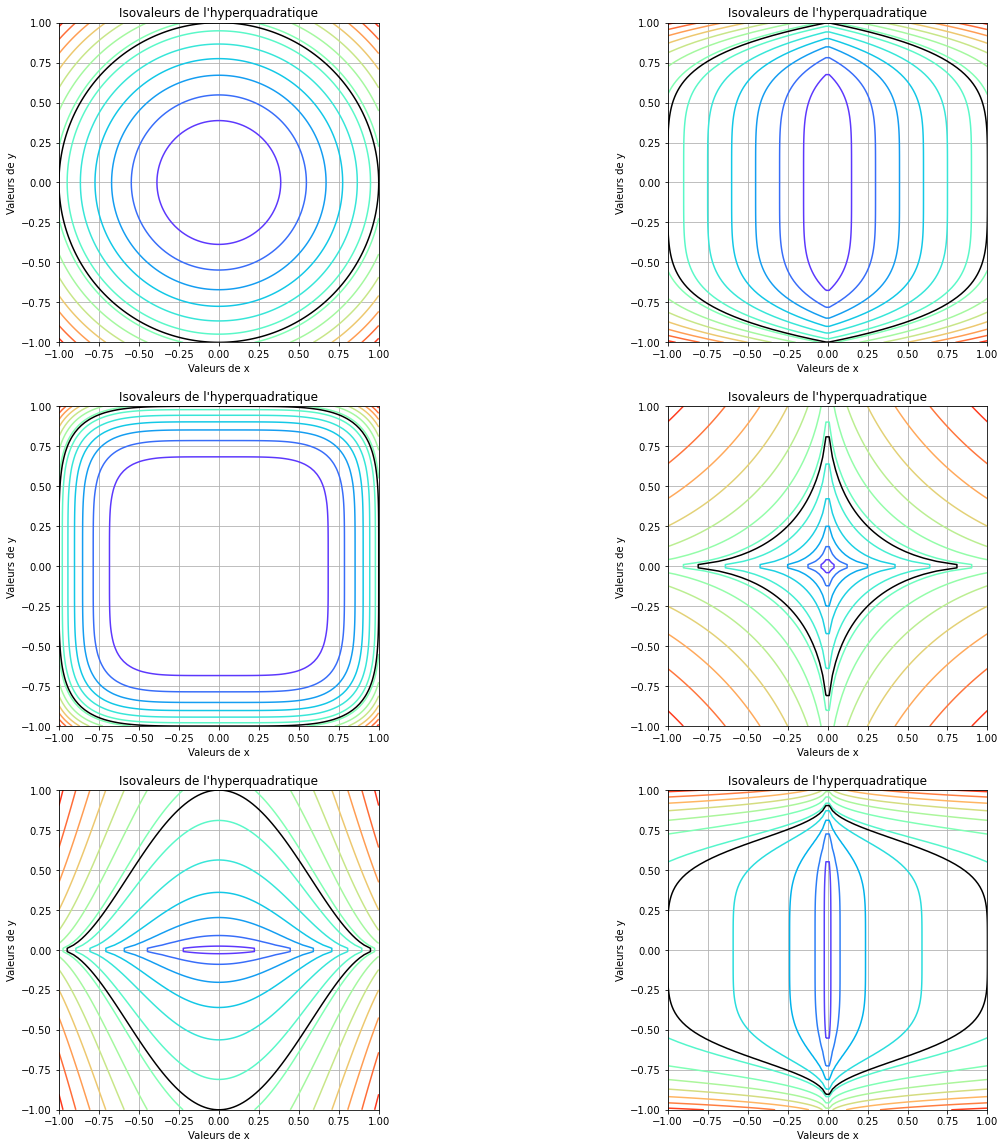

In [3]:
xmin, xmax, nx = -1, 1, 100
ymin, ymax, ny = -1, 1, 100
x1 = np.linspace(xmin,xmax,nx)
y1 = np.linspace(ymin,ymax,ny)
x2d, y2d = np.meshgrid(x1, y1)

# Tracé des isovaleurs de l'hyperquadrique + quadrique de niveau 1
nIso = 15
l1 = [2, 1, 5, 0.5, 2, 0.2] # En jouant sur la valeurs du paramètre gamma_k on retrouve différentes formes de contours
l2 = [2, 5, 5, 0.5, 0.5, 5]

plt.figure(figsize=(20,20))
for i in range(6):
    k = i+1
    plt.subplot(3,2,k)
    plt.contour(x2d,y2d,quad(x2d,y2d,l1[i],l2[i]),nIso, cmap = 'rainbow')
    plt.contour(x2d,y2d,quad(x2d,y2d,l1[i],l2[i]),nIso,levels =[1], colors = 'black')
    plt.title("Isovaleurs de l'hyperquadratique")
    plt.xlabel('Valeurs de x')
    plt.ylabel('Valeurs de y')
    plt.grid()
    plt.axis('square')

 **Conclusion:**
 
 Le paramètre $\gamma_k$ sert à définir la forme globale de l'hyperquadrique.


### Etude de l'effet des paramètres $\lambda$ sur la forme de l'hyperquadrique:


Nous allons étudier l'effet des paramètres $A_k, B_k, C_k $ en les faisant varier et en visualisant l'effet sur la forme de l'hyperquadrique de niveau 1:

In [4]:
# Forme plus générale
def Quadrique(A, B, C,gamma,nH, x,y):
  somme = 0
  for k in range(nH):
    somme += abs(A[k]*x + B[k]*y + C[k])**gamma[k]
  return somme

# Définir l'intervalle de la visualisation
xmin, xmax, nx = -2, 2, 301
ymin, ymax, ny = -2, 2, 301
x1 = np.linspace(xmin,xmax,nx)
y1 = np.linspace(ymin,ymax,ny)
x2d, y2d = np.meshgrid(x1, y1)

# Les paramètres fixés
nIso = 21
nH = 2
gamma = np.array([2,2])

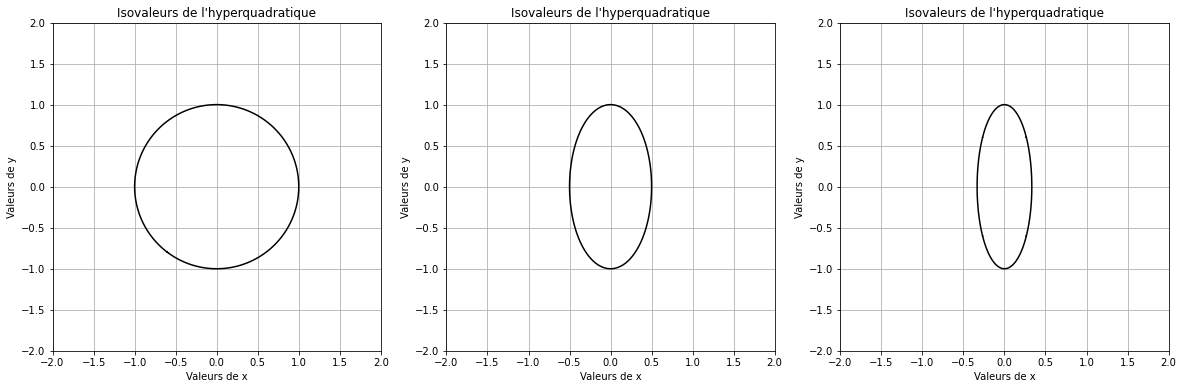

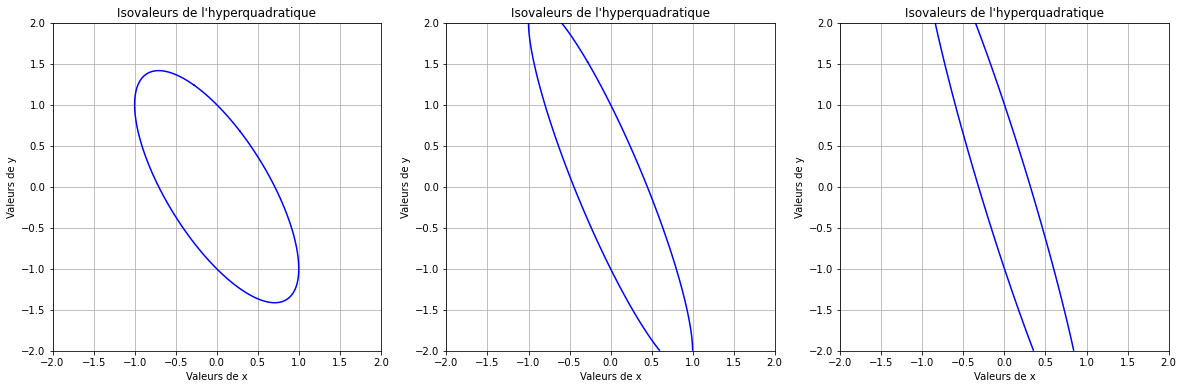

In [5]:
# Effet du paramètres A_k:
plt.figure(figsize=(20,20))
for i in range (3):
 # Tracé des isovaleurs de l'hyperquadrique
    A = np.array([i+1,0])     
    B = np.array([0,1])
    C = np.array([0,0])
    plt.subplot(1,3,i+1)
    plt.contour(x2d,y2d,Quadrique(A,B,C,gamma,nH,x2d,y2d),nIso,levels =[1], colors = 'black')
    plt.title("Isovaleurs de l'hyperquadratique")
    plt.xlabel('Valeurs de x')
    plt.ylabel('Valeurs de y')
    plt.grid()
    plt.axis('square')

plt.figure(figsize=(20,20))
for i in range (3):
 # Tracé des isovaleurs de l'hyperquadrique
    A = np.array([1,i+1])     
    B = np.array([0,1])
    C = np.array([0,0])
    plt.subplot(1,3,i+1)
    plt.contour(x2d,y2d,Quadrique(A,B,C,gamma,nH,x2d,y2d),nIso,levels =[1],colors = 'blue' )
    plt.title("Isovaleurs de l'hyperquadratique")
    plt.xlabel('Valeurs de x')
    plt.ylabel('Valeurs de y')
    plt.grid()
    plt.axis('square')


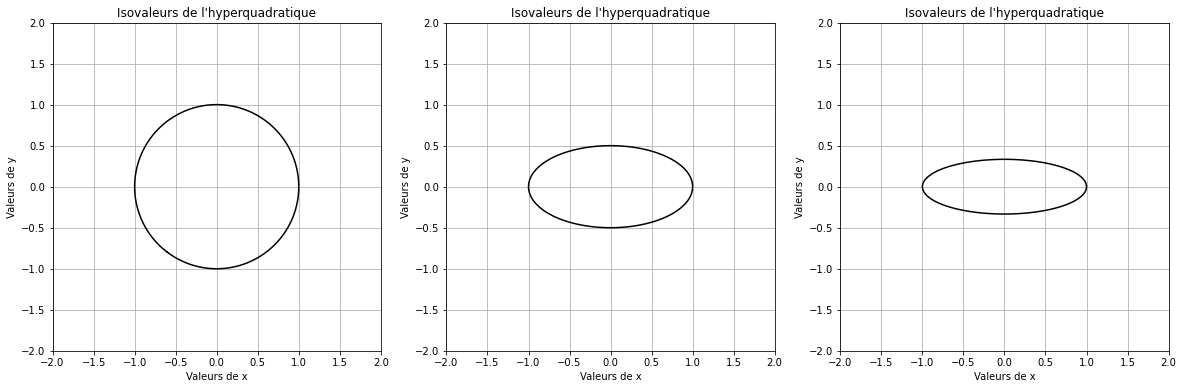

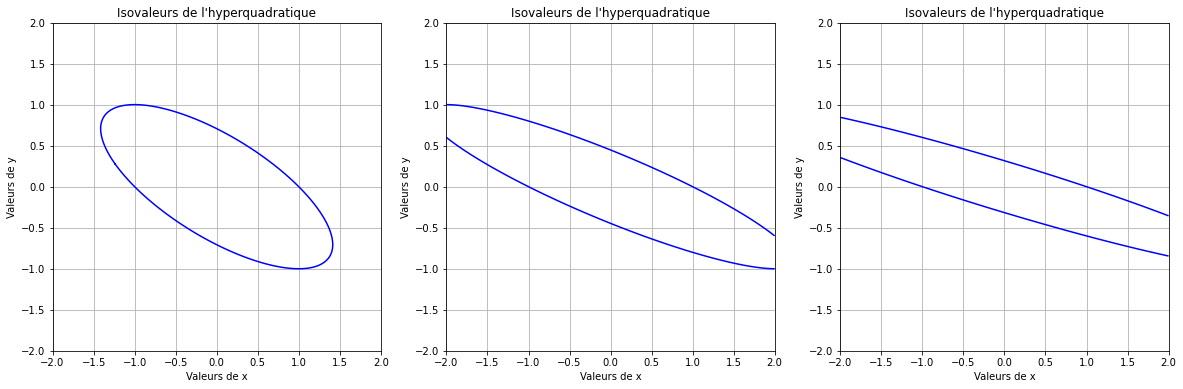

In [6]:
# Effet du paramètres B_k:
plt.figure(figsize=(20,20))
for i in range (3):
 # Tracé des isovaleurs de l'hyperquadrique
    A = np.array([0,1])     
    B = np.array([i+1,0])
    C = np.array([0,0])
    plt.subplot(1,3,i+1)
    plt.contour(x2d,y2d,Quadrique(A,B,C,gamma,nH,x2d,y2d),nIso,levels =[1], colors = 'black')
    plt.title("Isovaleurs de l'hyperquadratique")
    plt.xlabel('Valeurs de x')
    plt.ylabel('Valeurs de y')
    plt.grid()
    plt.axis('square')

plt.figure(figsize=(20,20))
for i in range (3):
 # Tracé des isovaleurs de l'hyperquadrique
    A = np.array([0,1])     
    B = np.array([1,i+1])
    C = np.array([0,0])
    plt.subplot(1,3,i+1)
    plt.contour(x2d,y2d,Quadrique(A,B,C,gamma,nH,x2d,y2d),nIso,levels =[1], colors = 'blue')
    plt.title("Isovaleurs de l'hyperquadratique")
    plt.xlabel('Valeurs de x')
    plt.ylabel('Valeurs de y')
    plt.grid()
    plt.axis('square')

**Conclusion:**

Les paramètres $A_k, B_k$ Agissent sur la largeur et la longueur de l'hyperquadrique suivant les deux axes x et y.

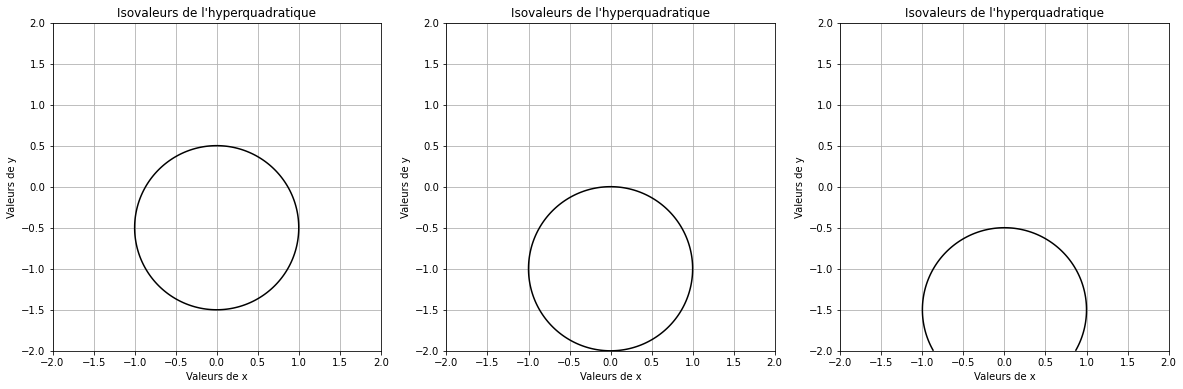

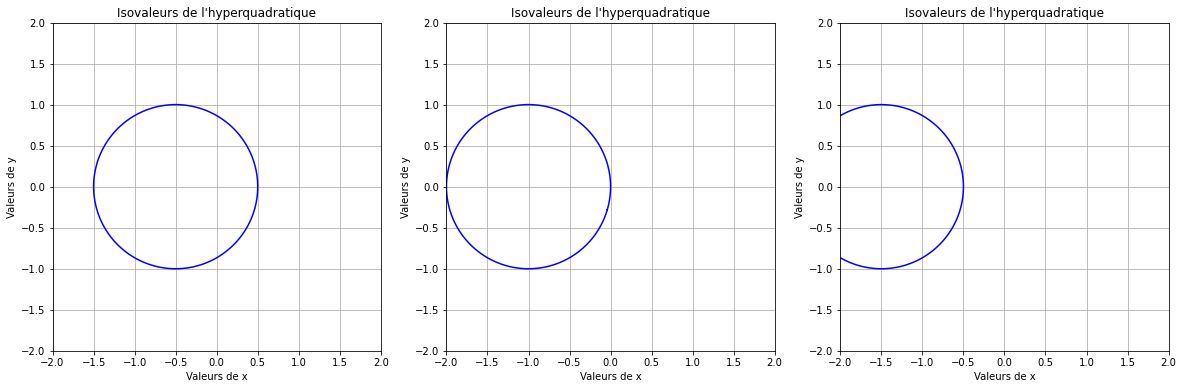

In [7]:
# Effet du paramètres C_k:
plt.figure(figsize=(20,20))
for i in range (3):
 # Tracé des isovaleurs de l'hyperquadrique
    A = np.array([0,1])     
    B = np.array([1,0])
    C = np.array([(i+1)/2,0])
    plt.subplot(1,3,i+1)
    plt.contour(x2d,y2d,Quadrique(A,B,C,gamma,nH,x2d,y2d),nIso,levels =[1], colors = 'black')
    plt.title("Isovaleurs de l'hyperquadratique")
    plt.xlabel('Valeurs de x')
    plt.ylabel('Valeurs de y')
    plt.grid()
    plt.axis('square')

plt.figure(figsize=(20,20))
for i in range (3):
 # Tracé des isovaleurs de l'hyperquadrique
    A = np.array([0,1])     
    B = np.array([1,0])
    C = np.array([0,(i+1)/2])
    plt.subplot(1,3,i+1)
    plt.contour(x2d,y2d,Quadrique(A,B,C,gamma,nH,x2d,y2d),nIso,levels =[1], colors = 'blue')
    plt.title("Isovaleurs de l'hyperquadratique")
    plt.xlabel('Valeurs de x')
    plt.ylabel('Valeurs de y')
    plt.grid()
    plt.axis('square')

**Conclusion:**

Le paramètre $C_k$ est une paramètre de translation.

## Dessiner les droites enveloppantes:

Les droites enveloppantes nous serviront à guider et délimiter l'hyperquadraique.


Le contour est définie par: $ \varphi(x,y,\lambda) = \sum_{k=1}^{nH} |A_k.x + B_k.y + C |^{\gamma_k} = 1$ et $\gamma_k > 0$.

Donc, $\forall k: |A_k.x + B_k.y + C | \leq 1 $, d'oû: $ 1 \leq A_k.x + B_k.y + C \leq 1$

Si $B_k \neq 0$:
$$
-\frac{A_k}{B_k}.x - \frac{C_k}{B_k} - \frac{1}{B_k}\leq y \leq \frac{A_k}{B_k}.x + \frac{C_k}{B_k} + \frac{1}{B_k}
$$


Si $B_k = 0$ :
$$
-\frac{C_k}{A_k} - \frac{1}{A_k}\leq x \leq -\frac{C_k}{A_k} + \frac{1}{A_k} 
$$


In [8]:
#Fonction pour calculer les droites enveloppantes:
def droite ( A , B , C, nH):
    sortie = []
    for k in range (nH):
        x1 = np.linspace(-10,10,101)
        Y1 = np.linspace(-10,10,101)
        x2 = np.linspace(-10,10,101)
        Y2 = np.linspace(-10,10,101)
        if B[k] != 0:
            for i in range(len(x1)):
                Y1[i]=(-(A[k]/B[k])*x1[i]-(C[k]/B[k])+1/B[k])
        elif B[k] == 0:
            for i in range(len(Y1)):
                x1[i]= -C[k]/A[k] + (1/A[k])


        if B[k] != 0:
            for i in range(len(x2)):
                Y2[i]=(-(A[k]/B[k])*x2[i]-(C[k]/B[k])-1/B[k])
        elif B[k] == 0:
            for i in range(len(Y2)):
                x2[i]=-C[k]/A[k] - (1/A[k])

        sortie.append(x1)
        sortie.append(Y1)
        sortie.append(x2)
        sortie.append(Y2)

    return sortie

(-2.0, 2.0, -2.0, 2.0)

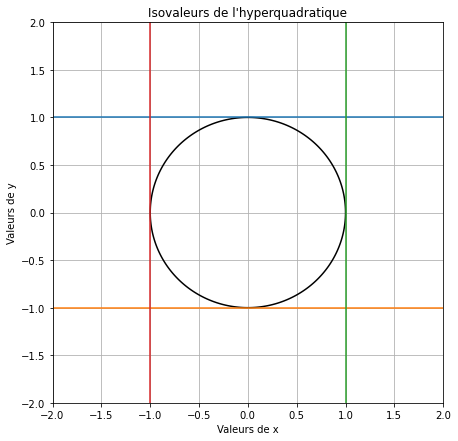

In [9]:
# Définir l'intervalle de la visualisation
xmin, xmax, nx = -2, 2, 301
ymin, ymax, ny = -2, 2, 301
x1 = np.linspace(xmin,xmax,nx)
y1 = np.linspace(ymin,ymax,ny)
x2d, y2d = np.meshgrid(x1, y1)

# Les paramètres fixés
nIso = 21
nH = 2
gamma = np.array([2,2])
A = np.array([0,1])     
B = np.array([1,0])
C = np.array([0,0])

D = droite(A,B,C,nH)
plt.figure(figsize=(7,7))
# Dessin des droites enveloppantes
plt.plot(D[0],D[1])
plt.plot(D[2],D[3])
plt.plot(D[4],D[5])
plt.plot(D[6],D[7])

# Dessiner l'isovaleurs de niveau 1
plt.contour(x2d,y2d,Quadrique(A,B,C,gamma,nH,x2d,y2d),nIso,levels =[1], colors = 'black')

plt.title("Isovaleurs de l'hyperquadratique")
plt.xlabel('Valeurs de x')
plt.ylabel('Valeurs de y')
plt.grid()
plt.axis([-2,2,-2,2])

## Implémentation de la fonction HQ_trace (...):

L'implémentation d'une fonction **HQ_trace ()** permettera à partir de paramètres $\lambda$ de visualiser une hyperquadrique de niveau 1 et ses droites enveloppantes.

In [30]:
def HQ_trace(lambdas,x,y,level):
    # Lambdas: [A_k, B_k, C_k, gamma_K] Paramètres de l'hyperquadriques
    # x,y : Intervalle de visualisation à partir du quel nous allons créer une grille de valeurs pour notre contour
    # level: Niveu de l'isovaleur qu'on desire visualiser ( Dans notre cas on se limitera à li'sovaleur de niveau 1)

    nIso = 21 # Valeurs par défaut
    
    if len(lambdas[0]) == len(lambdas[1]):
        # Récupérer les paramètre de l'hyperquadrique
        A, B, C, G = [], [], [],[] 
        for i in range(len(lambdas)):
            A.append(lambdas[i][0])
            B.append(lambdas[i][1])
            C.append(lambdas[i][2])
            G.append(lambdas[i][3])
    
        m = len(x)
        x1,y1 = [0]*m,[0]*m
        # Créer un grille de valeurs
        x2d,y2d = np.meshgrid(x,y)
    
    
        #visualisation des isovaleurs
        #plt.contour(x2d,y2d,Quadrique(A,B,C,G,2,x2d,y2d),nIso, cmap = 'rainbow')
        plt.contour(x2d,y2d,Quadrique(A,B,C,G,2,x2d,y2d),nIso,levels =[level], colors = 'black')
        plt.title("Isovaleurs de l'hyperquadratique")
        plt.xlabel('Valeurs de x')
        plt.ylabel('Valeurs de y')
        #plt.grid()
        plt.axis('square')
    
    
        for i in range (len(lambdas)):
            for k in range (m):
                x1[k] = x[k]
                y1[k] = y[k]

            if B[i] != 0:
                for k in range (m):
                    y1[k]= (-(A[i]/B[i])*x1[k]-(C[i]/B[i])+1/B[i])
                plt.plot(x1,y1)
                for k in range (m):
                    y1[k]= (-(A[i]/B[i])*x1[k]-(C[i]/B[i])-1/B[i])
                plt.plot(x1,y1)
        
            else :
                for k in range (m):
                    x1[k]=-C[i]/A[i]+ (1/A[i])
                plt.plot(x1,y1)
                for k in range (m):
                    x1[k]=-C[i]/A[i]- (1/A[i])
                plt.plot(x1,y1)
    else:
        print('Des paramètres lambdas sont manquants !!!!!')
                

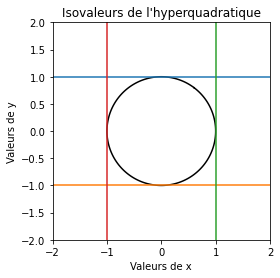

In [31]:
# Test de la fonction HQ_trace
lambda1 = [1,0,0,2]
lambda2 = [0,1,0,2]
lamda =[lambda2,lambda1]
nIso = 15
x = np.linspace(-2,2,301)
y = np.linspace(-2,2,301)
level = 1
HQ_trace(lamda,x,y,level)

# Phase 2 :  FItter un Nuage de points


### Formalisation du problème:

L'objectif dans cette partie est d'identifier les paramètres d'une hyperquadrique approchant au mieux un contour défini par un nuage de points, tel que $ N_{h} = 2 $ et 6 des 8 paramètres sont connus, d'ou il n'y a que deux paramètres: a et b à déterminer pour l'hyperquadrique définie par l'équation:


$$\Psi(x,y,a,b) = 0 $$
$$ avec \:\: \Psi (x,y,a,b)=(ax+by)^4+(x+y)^4-1 $$


Le but est de fitter un ensemble de points $(x,y)_{i=1,N}$ c'est à dire de trovuer les coéfficients a et b tel que l'hyperquadrique passe au mieux par ces points.
Il faut alors définir un critère de distance $J$ entre un point (x_{i},y_{i}) et l'hyperquadrique à minimiser:


$$ J(a,b) = \sum_{i=1}^{i=N}[\Psi_{i}(x_{i},y_{i},a,b)]^2 $$

### Importer le nuage de points:


In [12]:
import csv
# Importer les données à partir du fichier Excel
with open('Data_HQ_Ph1et2.csv', newline ='') as dataDoc:
    datareader = csv.reader(dataDoc, delimiter=',', quotechar='|')
    data = [[],
            []]
    i = 0
    for ligne in datareader:
        for elm in ligne:
            # Convertir les caractères en float
            elm = float(elm)
            # Organiser nos données suivants les lignes
            data[i].append(elm)
        i = i+1

(-2.0, 2.0, -2.0, 2.0)

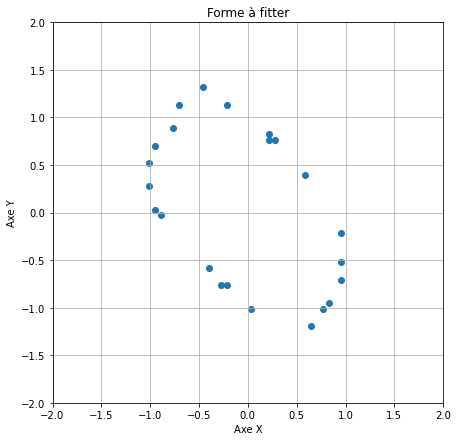

In [13]:
# Dessiner les données
plt.figure(figsize=(7,7))
plt.scatter(data[0],data[1])
plt.grid()
plt.title('Forme à fitter')
plt.xlabel('Axe X')
plt.ylabel('Axe Y')
plt.axis([-2,2,-2,2])


## Déterminer les paramètres a et b de l'hyperquadrique:

### Definir les fonctions à utiliser pour notre problème:


In [14]:
# Definir notre hyperquadrique:
def phi (a, b, xi, yi):
    return (a*xi + b*yi)**4 + (xi + yi)**4 - 1

# Définir le critère à minimiser:
def J(a, b, x, y):
    somme = 0
    for i in range(len(x)):
        somme += phi(a, b, x[i], y[i])**2
    return somme


### Méthode du gradiant:


   La descente de gradient est un algorithme d'optimistion différentiable trop puissant, il est par conséquant destiné à minimiser une fonction réelle définie sur un espace euclidien.L'algorithme est itératif et procède donc par améliorations succésives. Au point courant, un déplacement est effectué dans le sens contraire du gradient, d'une manière à faire décroitre notre fonction.
La méthode de descente de gradient génerent une suite des points $ X_{n}$ tel que : 


   $$
   \forall  n \:\:\:\:  J (X_{n}) <  J(X_{n-1}) 
   $$
 à chaque itération, on fait diminuer la valeur de la fonction J en se déplacement dans la direction de plus grand pente (sens opposé du gradient).L'algorithme générale est donné par le suivant :
 
 
 $$
   X_{n} =   X_{n-1} - \alpha \:. \nabla{J(X_{n-1})}
  $$
  
  
avec $\alpha > 0 $  pour que   $J (X_{n}) <  J(X_{n-1})$, le déplacement se fait plus au moins tout dépend sa valeur.

### Algorithme:

Fonction à minimiser $J_{data}(a,b) = \sum_{i=1}^{N}[\Psi_{i}(a,b)]^2 $   tel que $ \Psi(a,b)=(ax+by)^4 + (x+y)^4 - 1 $

$ \nabla J(a,b) = \sum_{i=1}^{N}\begin{pmatrix}\frac{dJ}{da}(a,b) \\ \frac{dJ}{db}(a,b) \end{pmatrix} = 
\quad  \sum_{i=1}^{N}\begin{pmatrix} 8x\:(ax+by)^3[\:(ax+by)^4+\:(x+y)^4-1\:] \\ 8y\:(ax+by)^3[\:(ax+by)^4+\:(x+y)^4-1]\end{pmatrix} \quad $

pour trouver a et b, on implémente cet algorithme : 
+ Parametres $X_0,\alpha, \epsilon, n,\:n_{max}$:

 $\:\:\:\:\:\: X_0$: point initial,$\:\boldsymbol{\epsilon}\:$: précision, $dx$: longeur de déplacement pour une itération
 
 $\:\:\:\:\:\:$   $n$: nombre d'itérations, $n_{max}$: nombre maximale d'itérations autorisées
 

+ Initialisation: $X_{n-1} \xleftarrow{}X_{0}, dX \xleftarrow{}1,n \xleftarrow{}0 $
+ Tant que $dX > \epsilon\:\: et \:\: n < n_{max}$

  $\:\:\:\:\:\: X_{n} \xleftarrow{} X_{n-1} - \alpha.\nabla J(X_{n-1})$
  
  $\:\:\:\:\:\: dx \xleftarrow{} \alpha. ||\nabla J(X_{n-1})||$
  
  $\:\:\:\:\:\: n \xleftarrow{} n+1 $
+ Converge $\xleftarrow{} (dX \leq \epsilon)$

In [15]:
# Gradiant de J:
def gradJ(a,b,x,y):
    dJ_da, dJ_db = 0,0
    for i in range(len(x)):
        dJ_da += 8*x[i]*(a*x[i] + b*y[i])**3 * ((a*x[i] + b*y[i])**4 + (x[i] + y[i])**4 - 1)
        dJ_db += 8*y[i]*(a*x[i] + b*y[i])**3 * ((a*x[i] + b*y[i])**4 + (x[i] + y[i])**4 - 1)
    
    return dJ_da, dJ_db

In [16]:
# Implémentation de l'algorithme de descente de gradiant
def descentGrad (x0, alpha, eps, nmax,x,y):
    tab_an = []
    tab_bn = []
    an_1 = x0[0]
    bn_1 = x0[1]
    dX = 1
    n = 0
    message = 'False'
    while dX > eps and n < nmax:
        an = an_1 - alpha * gradJ(an_1,bn_1,x,y)[0]
        bn = bn_1 - alpha * gradJ(an_1,bn_1,x,y)[1]
        dX = alpha * np.sqrt(gradJ(an_1,bn_1,x,y)[0]**2 + gradJ(an_1,bn_1,x,y)[1]**2)
        n += 1
        
        #print(f'n = {n}: ({an},{bn})') Afficher les resultats intermediaires
        tab_an.append(an)
        tab_bn.append(bn)
        an_1 = an
        bn_1 = bn
    if dX <= eps:
        message = 'True'
    
    return tab_an,tab_bn,message,n

### Application de la descente de gradiant:

In [17]:
# Test de la descente de gradiant
# Solution 1
x0 = (0,-0.35)
alpha = 1e-3
nmax = 100
eps = 1e-6

# Solution 2:
x1 = (0,0.35)

 # Converge a partir de la 356 Itterations
a0,b0, message0,n0 = descentGrad (x0, alpha, eps, nmax,data[0],data[1])
a1,b1, message1,n1 = descentGrad (x1, alpha, eps, nmax,data[0],data[1])

Solution_1
Point de départ: (0, -0.35)
Point finale: (0.6816322151853667, -0.48201139088792455)
Nombre d'itterations: 100
Convergence: False

Solution_2
Point de départ: (0, 0.35)
Point finale: (-0.6816322151853667, 0.48201139088792455)
Nombre d'itterations: 100
Convergence: False


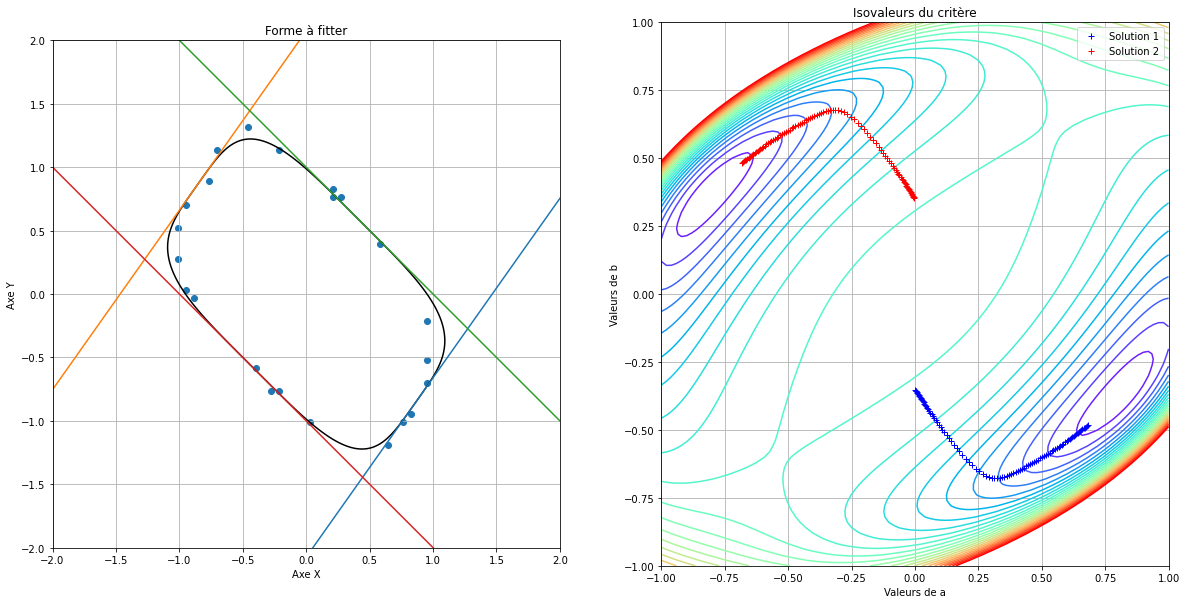

In [18]:
# Message à afficher sur la console
print("Solution_1")
print(f"Point de départ: {x0}")
print(f"Point finale: {(a0[-1],b0[-1])}")
print(f"Nombre d'itterations: {n0}")
print(f"Convergence: {message0}\n")

print("Solution_2")
print(f"Point de départ: {x1}")
print(f"Point finale: {(a1[-1],b1[-1])}")
print(f"Nombre d'itterations: {n1}")
print(f"Convergence: {message1}")

xmin, xmax, nx = -2, 2, 301
ymin, ymax, ny = -2, 2, 301
x1 = np.linspace(xmin,xmax,nx)
y1 = np.linspace(ymin,ymax,ny)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)

# Dessiner le Nuage de points
plt.scatter(data[0],data[1])

# Tracé des isovaleurs de l'hyperquadrique
nIso = 21
lamda = [[a0[-1],b0[-1],0,4],[1,1,0,4]]
#lamda = [[a1[-1],b1[-1],0,4],[1,1,0,4]]
level = 1
HQ_trace(lamda,x1,y1,level)
plt.title('Forme à fitter')
plt.xlabel('Axe X')
plt.ylabel('Axe Y')
plt.axis([-2,2,-2,2])
plt.grid()

# Dessiner les isovaleurs du contours
amin, amax, na = -1, 1, 101
bmin, bmax, nb = -1, 1, 101
a = np.linspace(amin,amax,na)
b = np.linspace(bmin,bmax,nb)
a2d, b2d = np.meshgrid(a, b)

# Tracé des isovaleurs de l'hyperquadrique
nIso = 500
level = np.arange(0,25,1)

# Tracé des isovaleurs de l'hyperquadrique
plt.subplot(1,2,2)
plt.contour(a2d,b2d,J(a2d,b2d,data[0],data[1]),nIso,levels = level, cmap = 'rainbow')
plt.plot(a0,b0,'+b', label= 'Solution 1')
plt.plot(a1,b1,'+r', label= 'Solution 2')
plt.title("Isovaleurs du critère")
plt.xlabel('Valeurs de a')
plt.ylabel('Valeurs de b')

plt.grid()
plt.legend()

### Influence du paramètre $ \alpha$ 

In [19]:
# Test de la descente de gradiant pour différente valeur de alpha
x0 = (0,-0.35)

alpha0 = 1e-2
alpha1 = 1e-3
alpha2 = 1e-4
alpha3 = 1e-5

nmax = 1500
eps = 1e-6

a0,b0, message0,n0 = descentGrad (x0, alpha0, eps, nmax,data[0],data[1])
a1,b1, message1,n1 = descentGrad (x0, alpha1, eps, nmax,data[0],data[1])
a2,b2, message2,n2 = descentGrad (x0, alpha2, eps, nmax,data[0],data[1])
a3,b3, message3,n3 = descentGrad (x0, alpha3, eps, nmax,data[0],data[1])

Point de départ: (0, -0.35)
nombre d'itérations maximal autorisées : 1500



Text(0.25, 0.45, 'Convergence: False')

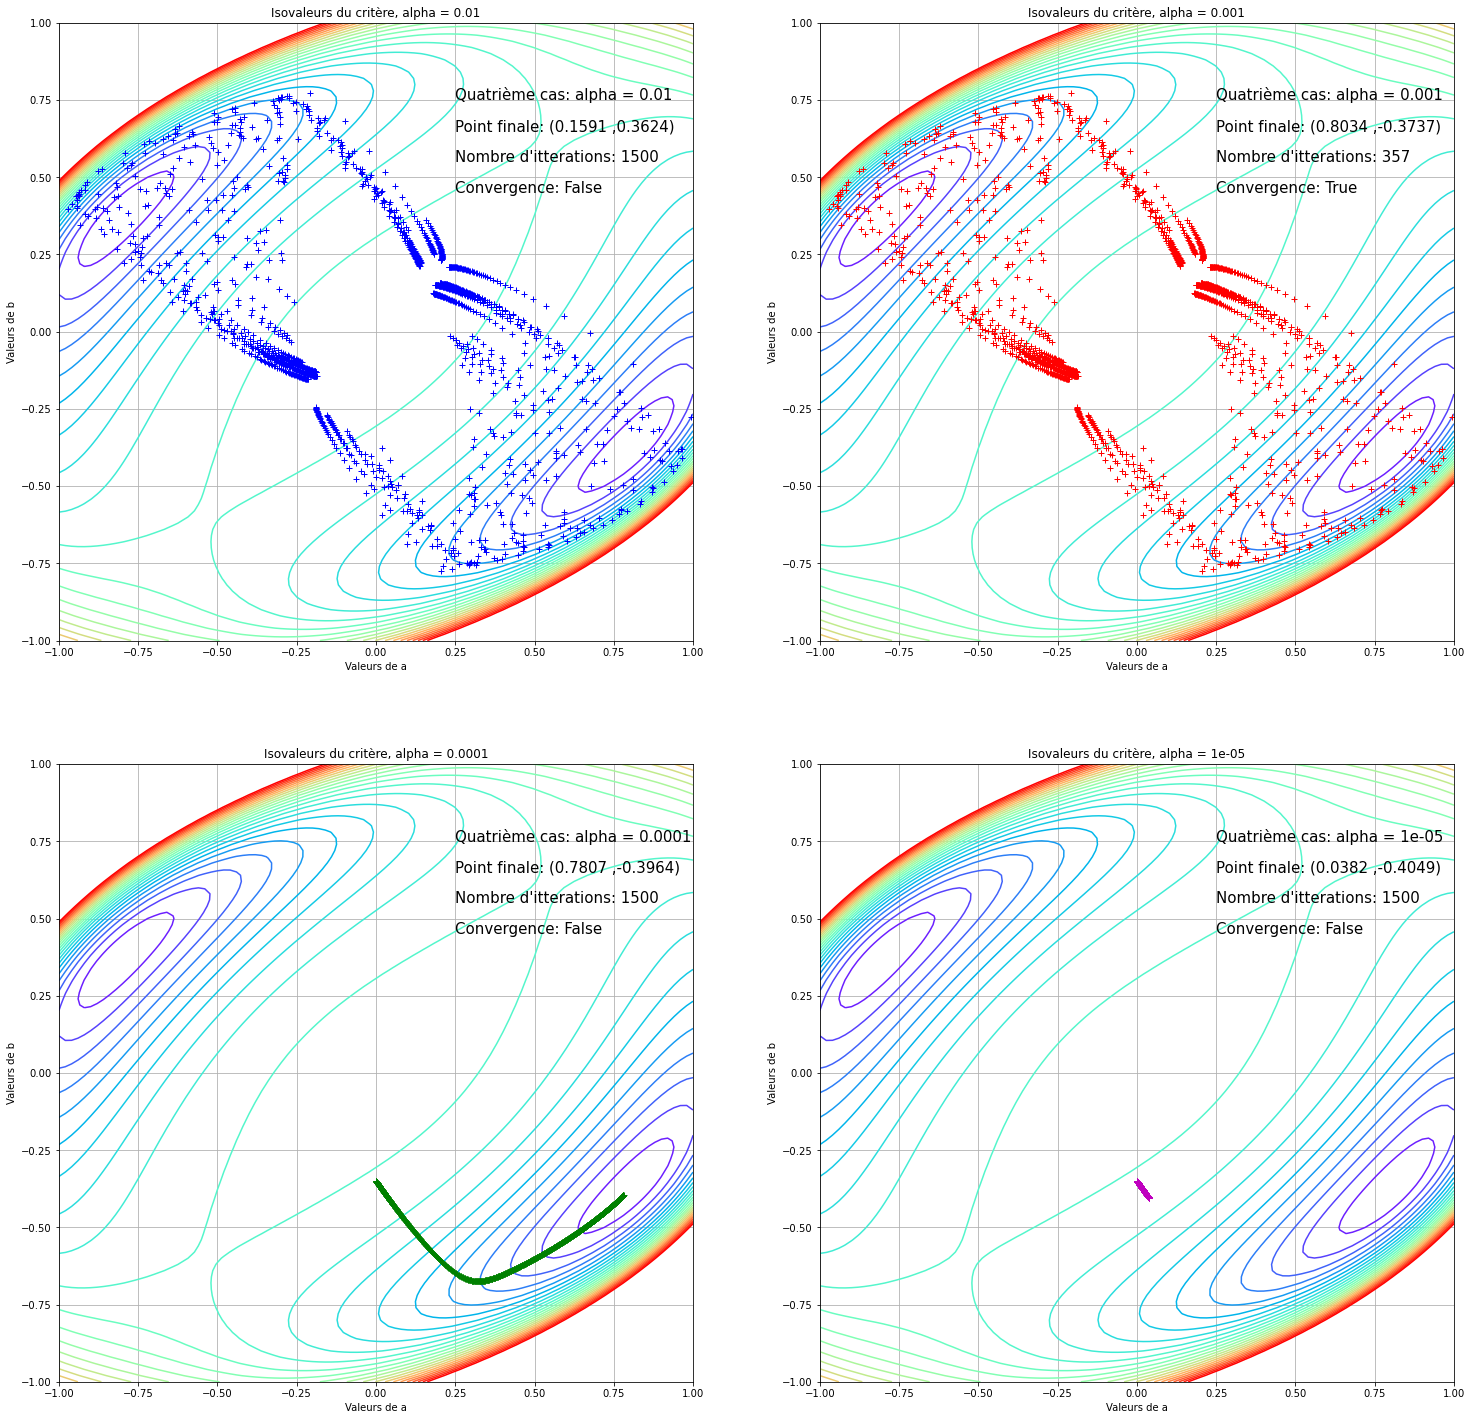

In [20]:
# Message à afficher sur la console
print(f"Point de départ: {x0}")
print(f"nombre d'itérations maximal autorisées : {nmax}\n")


xmin, xmax, nx = -2, 2, 301
ymin, ymax, ny = -2, 2, 301
x1 = np.linspace(xmin,xmax,nx)
y1 = np.linspace(ymin,ymax,ny)



# Tracé des isovaleurs de l'hyperquadrique
nIso = 21
lamda = [[a0[-1],b0[-1],0,4],[1,1,0,4]]

# Dessiner les isovaleurs du contours
amin, amax, na = -1, 1, 101
bmin, bmax, nb = -1, 1, 101
a = np.linspace(amin,amax,na)
b = np.linspace(bmin,bmax,nb)
a2d, b2d = np.meshgrid(a, b)

# Tracé des isovaleurs de l'hyperquadrique
nIso = 500
level = np.arange(0,25,1)

# Tracé des isovaleurs de l'hyperquadrique
plt.figure(figsize=(25,25))

plt.subplot(2,2,1)
plt.contour(a2d,b2d,J(a2d,b2d,data[0],data[1]),nIso,levels = level, cmap = 'rainbow')
plt.plot(a0,b0,'+b')
plt.title(f"Isovaleurs du critère, alpha = {alpha0}")
plt.xlabel('Valeurs de a')
plt.ylabel('Valeurs de b')
plt.grid()
plt.text(0.25,0.75,f"Quatrième cas: alpha = {alpha0}", fontsize = 15)
plt.text(0.25,0.65,f"Point finale: ({a0[-1]:.4f} ,{b0[-1]:.4f})", fontsize = 15)
plt.text(0.25,0.55,f"Nombre d'itterations: {n0}", fontsize = 15)
plt.text(0.25,0.45,f"Convergence: {message0}", fontsize = 15)


plt.subplot(2,2,2)
plt.contour(a2d,b2d,J(a2d,b2d,data[0],data[1]),nIso,levels = level, cmap = 'rainbow')
plt.plot(a0,b0,'+r')
plt.title(f"Isovaleurs du critère, alpha = {alpha1}")
plt.xlabel('Valeurs de a')
plt.ylabel('Valeurs de b')
plt.grid()
plt.text(0.25,0.75,f"Quatrième cas: alpha = {alpha1}", fontsize = 15)
plt.text(0.25,0.65,f"Point finale: ({a1[-1]:.4f} ,{b1[-1]:.4f})", fontsize = 15)
plt.text(0.25,0.55,f"Nombre d'itterations: {n1}", fontsize = 15)
plt.text(0.25,0.45,f"Convergence: {message1}", fontsize = 15)

plt.subplot(2,2,3)
plt.contour(a2d,b2d,J(a2d,b2d,data[0],data[1]),nIso,levels = level, cmap = 'rainbow')
plt.plot(a2,b2,'+g')
plt.title(f"Isovaleurs du critère, alpha = {alpha2}")
plt.xlabel('Valeurs de a')
plt.ylabel('Valeurs de b')
plt.grid()
plt.text(0.25,0.75,f"Quatrième cas: alpha = {alpha2}", fontsize = 15)
plt.text(0.25,0.65,f"Point finale: ({a2[-1]:.4f} ,{b2[-1]:.4f})", fontsize = 15)
plt.text(0.25,0.55,f"Nombre d'itterations: {n2}", fontsize = 15)
plt.text(0.25,0.45,f"Convergence: {message2}", fontsize = 15)


plt.subplot(2,2,4)
plt.contour(a2d,b2d,J(a2d,b2d,data[0],data[1]),nIso,levels = level, cmap = 'rainbow')
plt.plot(a3,b3,'+m')
plt.title(f"Isovaleurs du critère, alpha = {alpha3}")
plt.xlabel('Valeurs de a')
plt.ylabel('Valeurs de b')
plt.grid()
plt.text(0.25,0.75,f"Quatrième cas: alpha = {alpha3}", fontsize = 15)
plt.text(0.25,0.65,f"Point finale: ({a3[-1]:.4f} ,{b3[-1]:.4f})", fontsize = 15)
plt.text(0.25,0.55,f"Nombre d'itterations: {n3}", fontsize = 15)
plt.text(0.25,0.45,f"Convergence: {message3}", fontsize = 15)




### Conclusion:

+ L'example traité ci-dessus ne converge qu'à partir de 356 itterations avec $\alpha = 10^{-3}$ .
+ Le résultat est très dépandant de la valeur du paramètre $\alpha$ et de la précision $\epsilon$.
+ Plus la valeur du paramètre  $\alpha$ diminue, plus le nombre d'ittérations necessaires pour la convergence est élevé. Mais une condition s'impose: Le paramètre doit être assez petit pour vérifier cette propriété ($\leq 10^{-3}$).
+ Il existe deux minimums possibles pour notre critère. La convergence de notre algorithme vers l'une ou l'autre de ces deux solutions dépend du point de départ.

### Méthode de Newton:

Nous souhaitons minimiser une critère $J$ graçe à la méthode de Newton. Pour cela, $J$ est suposée être convexe sur $R$, ou du moins sur l'intervalle de recherche. On suppose aussi que les valeurs du gradiant $\nabla J$ et de la matrice hessienne $HJ$ sont connues.

Cette méthode repose sur le calcul de solutions approchées en utilisant le développement de Taylor au second degré.

$$
\nabla\tilde{J_{n-1}} = \nabla J_{n-1}(X_{n-1}) + HJ_{n-1}(X_{n-1})(X - X_n)
$$

Au minimum de notre fonction le gradiant est nul donc:

$$
\nabla\tilde{J_{n-1}} = 0 \implies \nabla J_{n-1}(X_{n-1}) + HJ_{n-1}(X_{n-1})(X - X_n) = 0
$$

d'oû:

$$
X_n = X_{n-1} + \Delta X
$$

 + $\Delta X$ : Solution du système linéaire : $HJ_{n-1}(X_{n-1}).\Delta X = \nabla J_{n-1}(X_{n-1})  $
 


### Algorithme:

Notre critère est en fonction de deux variables à minimiser $a, b$. On devra appliquer la méthode de Newton aux deux varable en mème temps.


**Algorithme:**

Choix des paramètre de l'algorithme: 
+ $X_0 = (a_0, b_0)$ : Point de départ de la recherche.
+ $\epsilon$ : Précision.
+ $n_max$ : Nombre d'ittérations max permis.


Initialisation:
+ $X_{n-1} \xleftarrow{}X_0$
+ $dX \xleftarrow{} 1$
+ $n \xleftarrow{} 0$

Tant que: $dX > \epsilon and n < n_{max}$
+ Calculer: $\nabla J_{n-1}(X_{n-1})$
+ Calculer: $HJ_{n-1}(X_{n-1})$
+ $\Delta X \xleftarrow{}$ Solution du système linéaire : $HJ_{n-1}(X_{n-1}).\Delta X = \nabla J_{n-1}(X_{n-1})  $
+ $X_n \xleftarrow{} X_{n-1} + \Delta X $
+ $dX \xleftarrow{} ||\Delta X ||$
+ $n \xleftarrow{} n+1$


Converge $\implies dX < \epsilon $

**Calcul des valeurs de $\Delta X$:**


Calculer la valeur de $\Delta X$ revient à résoudre le système linéaire suivant:
$$
HJ_{n-1}(X_{n-1}).\Delta X = \nabla J_{n-1}(X_{n-1})
$$

$$
\Delta X = HJ_{n-1}(X_{n-1})^{-1}.\nabla J_{n-1}(X_{n-1})
$$

Ce calcule se fera à l'aide de la fonction "**linalg.solve()** de la bibliothèque **Numpy**.


Avec: 
+ $\nabla J(a,b) = \begin{pmatrix}\frac{dJ}{da}(a,b)  \\ \frac{dJ}{db}(a,b) \end{pmatrix}$ : Gradiant du critère (calculé précedemment)


+ $HJ(a,b) = \begin{pmatrix}\frac{d^2J}{da^2}(a,b) & \frac{d^2J}{dab}(a,b)  \\ \frac{d^2J}{dba}(a,b) & \frac{d^2J}{db^2}(a,b) \end{pmatrix}\quad$: La matrice Héssienne du critère.


tel que:


$
HJ(a,b)
\begin{cases}
    \frac{\partial^2 j}{\partial a^2} = 32x^2.(ax + by)^6 + 24x^2((ax + by)^4 + (x +y)^4 - 1).(ax + by)^2 \\
    \frac{\partial^2 j}{\partial ab} = 32xy.(ax + by)^6 + 24xy((ax + by)^4 + (x +y)^4 - 1).(ax + by)^2 \\
    \frac{\partial^2 j}{\partial ba} = 32xy.(ax + by)^6 + 24xy((ax + by)^4 + (x +y)^4 - 1).(ax + by)^2 \\
    \frac{\partial^2 j}{\partial b^2} = 32y^2.(ax + by)^6 + 24y^2((ax + by)^4 + (x +y)^4 - 1).(ax + by)^2
\end{cases}
$



In [21]:
# Calcul de la matrice Hessienne:
def Hj(a,b,x,y):
    dJ_da2, dJ_dab, dJ_db2, dJ_dba = 0, 0, 0, 0
    for i in range(len(x)):
        dJ_da2 += 32*x[i]**2*(a*x[i] + b*y[i])**6 + 24*x[i]**2 *((a*x[i] + b*y[i])**4 + (x[i] + y[i])**4 - 1 )*(a*x[i] + b*y[i])**2
        dJ_dab += 32*x[i]*y[i]*(a*x[i] + b*y[i])**6 + 24*x[i]*y[i]*((a*x[i] + b*y[i])**4 + (x[i] + y[i])**4 - 1 )*(a*x[i] + b*y[i])**2
        dJ_dba += 32*x[i]*y[i]*(a*x[i] + b*y[i])**6 + 24*x[i]*y[i]*((a*x[i] + b*y[i])**4 + (x[i] + y[i])**4 - 1 )*(a*x[i] + b*y[i])**2
        dJ_db2 += 32*y[i]**2*(a*x[i] + b*y[i])**6 + 24*y[i]**2 *((a*x[i] + b*y[i])**4 + (x[i] + y[i])**4 - 1 )*(a*x[i] + b*y[i])**2
    return [[dJ_da2, dJ_dab],[dJ_dba,dJ_db2]]  

In [22]:
# Implémentation de l'algorithme de Newton
def Newton(x0, eps, nmax, x, y):
    tab_an = []
    tab_bn = []
    an_1 = x0[0]
    bn_1 = x0[1]
    n = 0
    dX = 1
    message ='False'
    while  dX > eps and n < nmax:
        gradJn_1 = np.array( gradJ(an_1,bn_1, x, y))
        HessJn_1 = np.array( Hj(an_1,bn_1,x, y))
        
        # Resolution du système linéaire
        deltaX = np.linalg.solve( HessJn_1,-gradJn_1)
        #print(f"n = {n}  {deltaX}")
        an = an_1 + deltaX[0]
        bn = bn_1 + deltaX[1]
        dX = np.sqrt(deltaX[0]**2 + deltaX[1]**2)
        n = n + 1
    
        #print(f'n = {n}     {(an,bn)}')
        tab_an.append(an)
        tab_bn.append(bn)
        an_1 = an
        bn_1 = bn
    if dX <= eps:
        message = 'True'
    return tab_an, tab_bn, message, n

In [23]:
# Test algorithme newton
# Point de depart 1
x0 = (0.5,-0.5)

nmax = 1000
eps = 1e-6
# Point de depart 2
x2 = (0,0.5)

# Point de depart 3
x3 = (0,-0.35)

a1, b1, message, n = Newton(x0, eps, nmax, data[0], data[1])
a2, b2, message2, n2 = Newton(x2, eps, nmax, data[0], data[1])
a3, b3, message3, n3 = Newton(x3, eps, nmax, data[0], data[1])

Point de départ: (0.5, -0.5)
Point finale: (1.0, 1.0)
Nombre d'itterations: 15
Convergence: True


(-2.0, 2.0, -2.0, 2.0)

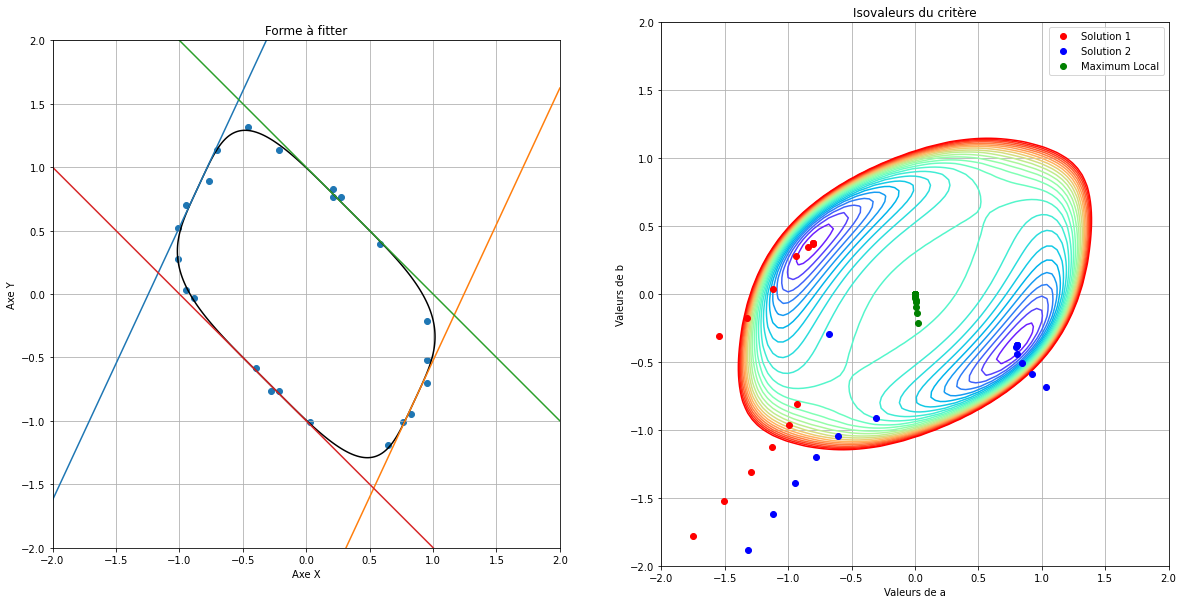

In [24]:
xmin, xmax, nx = -2, 2, 301
ymin, ymax, ny = -2, 2, 301
x1 = np.linspace(xmin,xmax,nx)
y1 = np.linspace(ymin,ymax,ny)

# Message à afficher sur la console
print(f"Point de départ: {x0}")
print(f"Point finale: {(a[-1],b[-1])}")
print(f"Nombre d'itterations: {n}")
print(f"Convergence: {message}")

# Dessiner le Nuage de points
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(data[0],data[1])
plt.axis([-2,2,-2,2])
plt.grid()

# Tracé des isovaleurs de l'hyperquadrique
nIso = 21
lamda = [[a1[-1],b1[-1],0,4],[1,1,0,4]]
level = 1
HQ_trace(lamda,x1,y1,level)
plt.title('Forme à fitter')
plt.xlabel('Axe X')
plt.ylabel('Axe Y')
plt.axis([-2,2,-2,2])

# Tracé des isovaleurs du crière
amin, amax, na = -2, 2, 101
bmin, bmax, nb = -2, 2, 101
a = np.linspace(amin,amax,na)
b = np.linspace(bmin,bmax,nb)
a2d, b2d = np.meshgrid(a, b)

nIso = 500
level = np.arange(0,25,1)


plt.subplot(1,2,2)
plt.contour(a2d,b2d,J(a2d,b2d,data[0],data[1]),nIso,levels = level, cmap = 'rainbow')
plt.plot(a1,b1,'or', label = 'Solution 1')
plt.plot(a2,b2,'ob',label = 'Solution 2')
plt.plot(a3,b3,'og',label = 'Maximum Local')
plt.title("Isovaleurs du critère")
plt.xlabel('Valeurs de a')
plt.ylabel('Valeurs de b')
plt.grid()
plt.legend()
plt.axis([-2,2,-2,2])

### Conclusion:

+ L'algorithme converge vers une solution en moins d'ittérations que la descente de gradiant.
+ Le résultat est trés dépendant de la valeur du point de départ. Pour avoir un résultat qui converge vers un minimum il faut que la valeur du point de départ soit prés du minimum recherché.
+ L'algorithme est trés puissant, et permet d'avoir le résultat en quelques itérations.
+ l'algorithme ne converge pas forcemment ces un minimum (réf: Maximum local).
+ Pour utiliser l'algorithme il nous faudra connaitre la matrice Hessienne du critère à minimiser.

### Comparaison des deux méthodes:

Inconvenients et avantages des deux méthodes:
- **Descente de gradiant**:
 + (+) Plus facile à appliquer dès que les fonctions deviennent plus complèxes.
 + (+) Très robuste.
 + (-) Moins rapide que la méthode de Newton.
 + (-) Connaissance préalable des dérivées partielles premières.
 + (-) Bien choisir la vlauer du paramètre $\alpha$ (influence la convergence et la divergence).
- **Méthode de Newton**:
 + (+) Très puissant au voisinage de la solution.
 + (-) Convergence assurée, mais Ne converge pas forcemment vers un minimum..
 + (-) Très dépendant du point de départ qui doit être relativement proche de la solution.
 + (-) Nécessite de connaitre la valeur du gradiant et la matrice Hessienne du critère à minimiser.

### Application des deux méthodes en mème temps:

Maintenant il s'agit d'implémenter une fonction qui utilise les deux méthodes précedente (Descente de gradiant , Newton). Cette fonction utilisera la complémentarité de ces deux méthodes pour pallier aux inconvenients des deux tout en bénéficiant des leurs avantages.

L'implémentation de cette fonction aura pour objectif de converger vers une minimum quequle soit le point de départ choisi avec le moins d'ittérations possibles.

In [25]:
#implémentation de l'algorithme:

def descenteGrad_Newton (x0, eps, nmaxGrad, nmaxNew, x, y):
    a0,b0, message0,n0 = descentGrad (x0, 1e-3, eps, nmaxGrad,x, y)
    a1, b1, message1, n1 = Newton((a0[-1],b0[-1]), eps, nmaxNew, x, y)
    return a0+a1, b0+b1, message1, n1+n0


In [26]:
# Test de la fonction
x0 = (0.1,-0.1)
eps = 1e-6
nmax1 = 150
nmax2 = 100
a1, b1, message, n = descenteGrad_Newton (x0, eps, nmax1, nmax2, data[0], data[1])

Point de départ: (0.1, -0.1)
Point finale: (2.0, 2.0)
Nombre d'itterations: 164
Convergence: True


(-2.0, 2.0, -2.0, 2.0)

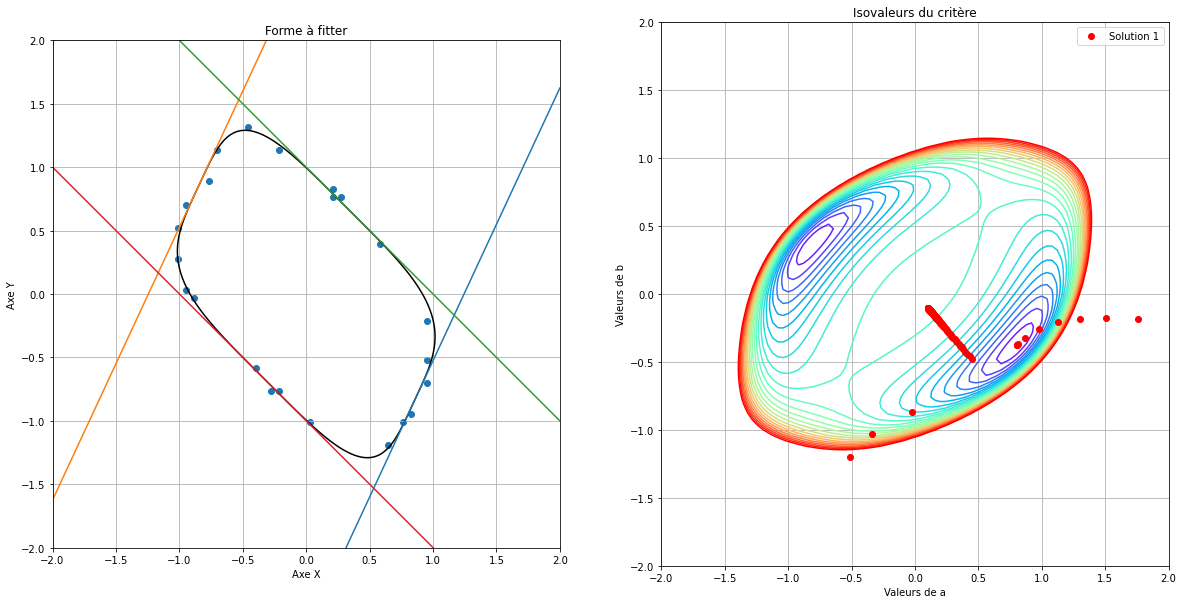

In [27]:
xmin, xmax, nx = -2, 2, 301
ymin, ymax, ny = -2, 2, 301
x1 = np.linspace(xmin,xmax,nx)
y1 = np.linspace(ymin,ymax,ny)

# Message à afficher sur la console
print(f"Point de départ: {x0}")
print(f"Point finale: {(a[-1],b[-1])}")
print(f"Nombre d'itterations: {n}")
print(f"Convergence: {message}")

# Dessiner le Nuage de points
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(data[0],data[1])
plt.axis([-2,2,-2,2])
plt.grid()

# Tracé des isovaleurs de l'hyperquadrique
nIso = 21
lamda = [[a1[-1],b1[-1],0,4],[1,1,0,4]]
level = 1
HQ_trace(lamda,x1,y1,level)
plt.title('Forme à fitter')
plt.xlabel('Axe X')
plt.ylabel('Axe Y')
plt.axis([-2,2,-2,2])

# Tracé des isovaleurs du crière
amin, amax, na = -2, 2, 101
bmin, bmax, nb = -2, 2, 101
a = np.linspace(amin,amax,na)
b = np.linspace(bmin,bmax,nb)
a2d, b2d = np.meshgrid(a, b)

nIso = 500
level = np.arange(0,25,1)


plt.subplot(1,2,2)
plt.contour(a2d,b2d,J(a2d,b2d,data[0],data[1]),nIso,levels = level, cmap = 'rainbow')
plt.plot(a1,b1,'or', label = 'Solution 1')
plt.title("Isovaleurs du critère")
plt.xlabel('Valeurs de a')
plt.ylabel('Valeurs de b')
plt.grid()
plt.legend()
plt.axis([-2,2,-2,2])

Par exemple le point de depart $(0.1,-0.1)$:
+ Descente de gradiant : Convergence à 486 ittérations.
+ Méthode de Newton: Pas de convergence vers la solution (Convergence vers le maximum local $(0, 0)$.
+ Combinaison des deux méthodes: Convergence assurée à partir de 150 ittérations.

### Conclusion:

Gràce à la combinaison des deux méthodes nous avons réussi à implémenter une fonction qui assure une convergence vers une solution avec le moins d'ittérations possible.